# Libreries

In [1]:
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib
#!pip install scikit-learn
#!pip install imblearn
#!pip install xgboost
#!pip install lightgbm
#!pip install shap

In [66]:
####### Dataframe management ######
import pandas as pd         
import numpy as np

####### Visualization ######
import seaborn as sns
import matplotlib.pyplot as plt

####### Encoding ######
from sklearn.preprocessing import MinMaxScaler

####### Train-Test Split ######
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

####### Resample ######
from imblearn.over_sampling import RandomOverSampler

####### Models ######
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier

####### Hyperparameter ######
from sklearn.model_selection import RandomizedSearchCV

####### Metrics ######
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

####### Interpretability ######
import shap

import warnings
warnings.filterwarnings("ignore")  # Disable warnings

import os

In [3]:
# plotting style
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pacoty.mplstyle')

# Import data

In [4]:
DATA_PATH = "./data"

In [5]:
df = pd.read_csv(os.path.join(DATA_PATH, "hotusa_cancellations.csv"), index_col=0)

In [6]:
df.head()

,HotelId,ReservationStatusDate,ArrivalDate,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,CustomerType,ADR,Meal,Country,Company,ReservedRoomType,IsRepeatedGuest,IsCanceled
10043,1,2016-12-15,2017-02-10,238,0,2,2,0,Transient,54.00,HB,PRT,NULL,A,False,True
19043,1,2015-12-07,2016-05-27,174,2,5,2,1,Transient,108.02,BB,PRT,NULL,F,False,True
3509,1,2015-08-24,2015-12-20,260,4,9,1,0,Transient,47.54,BB,PRT,NULL,D,False,True
5012,1,2016-01-05,2016-04-12,168,0,2,2,0,Transient,86.00,HB,PRT,NULL,A,False,True
17991,1,2015-11-11,2015-11-11,1,0,1,1,0,Transient,35.00,BB,PRT,88,A,True,True


In [7]:
df.shape

(33688, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33688 entries, 10043 to 40059
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   HotelId                33688 non-null  int64  
 1   ReservationStatusDate  33688 non-null  object 
 2   ArrivalDate            33688 non-null  object 
 3   LeadTime               33688 non-null  int64  
 4   StaysInWeekendNights   33688 non-null  int64  
 5   StaysInWeekNights      33688 non-null  int64  
 6   Adults                 33688 non-null  int64  
 7   Children               33688 non-null  int64  
 8   CustomerType           33688 non-null  object 
 9   ADR                    33688 non-null  float64
 10  Meal                   33688 non-null  object 
 11  Country                33256 non-null  object 
 12  Company                33688 non-null  object 
 13  ReservedRoomType       33688 non-null  object 
 14  IsRepeatedGuest        33688 non-null  bool   
 15

# Data Cleaning

## Duplicated rows

In [9]:
print(df.duplicated().sum(), 'duplicated rows were deleted')
df.drop_duplicates(inplace=True)

5156 duplicated rows were deleted


## Null values

In [10]:
df.isnull().sum()

HotelId                    0
ReservationStatusDate      0
ArrivalDate                0
LeadTime                   0
StaysInWeekendNights       0
StaysInWeekNights          0
Adults                     0
Children                   0
CustomerType               0
ADR                        0
Meal                       0
Country                  415
Company                    0
ReservedRoomType           0
IsRepeatedGuest            0
IsCanceled                 0
dtype: int64

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

HotelId                  0
ReservationStatusDate    0
ArrivalDate              0
LeadTime                 0
StaysInWeekendNights     0
StaysInWeekNights        0
Adults                   0
Children                 0
CustomerType             0
ADR                      0
Meal                     0
Country                  0
Company                  0
ReservedRoomType         0
IsRepeatedGuest          0
IsCanceled               0
dtype: int64

# Exploratory Data Analysis

## Target

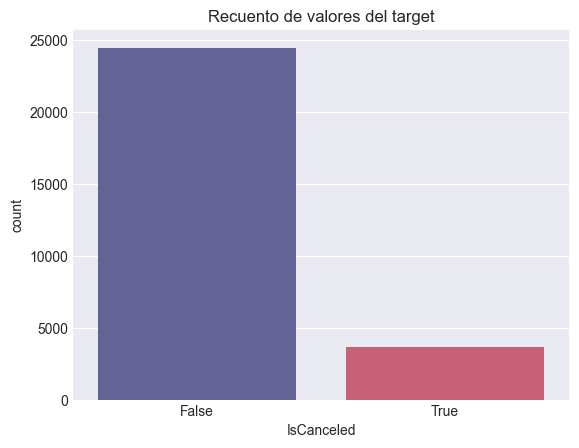

In [12]:
sns.countplot(x=df['IsCanceled'])
plt.title(f'Recuento de valores del target')
plt.show()

Se puede observar que el target está desbalanceado. Más adelante se aplicará alguna técnicas de re-muestreo para resolver este problema.

## Categorical

In [13]:
categorical = ['CustomerType', 'Meal', 'ReservedRoomType', 'IsRepeatedGuest']

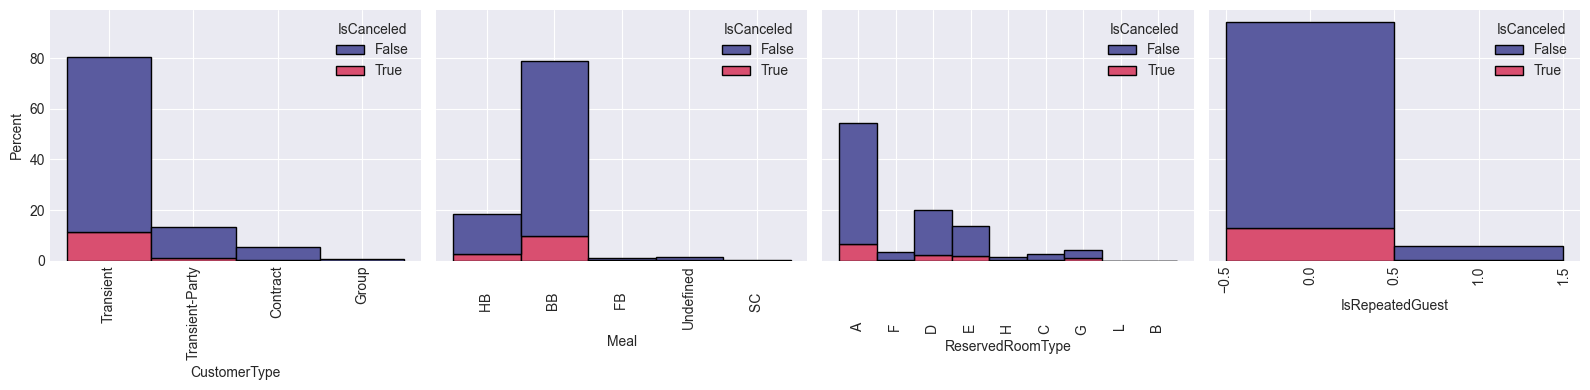

In [14]:
fig, ax = plt.subplots(1, len(categorical), figsize=(16, 4), sharey=True)

for i, label in enumerate(categorical):
    chart = sns.histplot(data=df, x=label, hue='IsCanceled', 
                         ax=ax[i], discrete=True, stat='percent', alpha=1., 
                         multiple='stack')
    plt.setp(chart.get_xticklabels(), rotation = 90)

fig.tight_layout()

Conclusiones: Según las gráficas, las variables 'IsRepeatedGuest' tendrá un efecto negativo en el rendimiento del modelo en términos de sobreajuste y sesgo. Por lo tanto, es una sabia decisión omitir 'IsRepeatedGuest del conjunto de datos.


In [15]:
df.drop('IsRepeatedGuest', axis=1, inplace=True)

## Non Categorical

In [16]:
non_categorical = ['HotelId', 'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children']

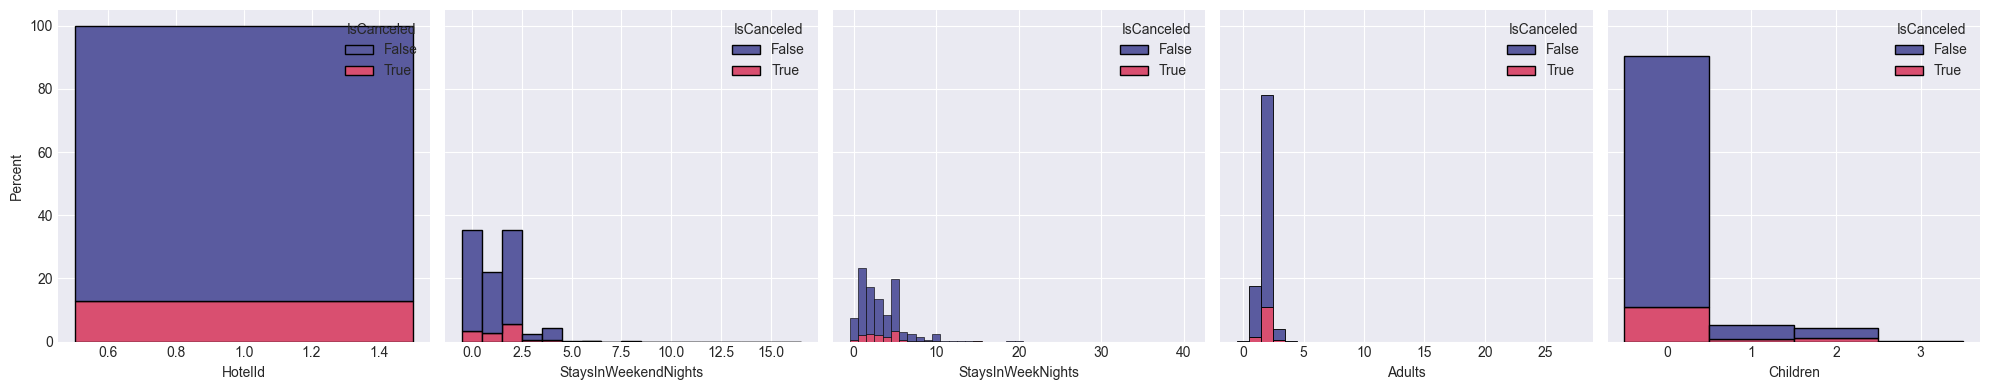

In [17]:
fig, ax = plt.subplots(1, 5, figsize=(20, 4), sharey=True)
ax = ax.flatten()

for i, label in enumerate(non_categorical):
    sns.histplot(data=df, x=label, hue='IsCanceled', ax=ax[i], 
                 discrete=True, stat='percent', alpha=1., multiple='stack', 
                 binwidth=1)

fig.tight_layout()

La variable 'HotelId' contiene un único valor para todo el dataset, por lo que no aporta ninguna información.

<Axes: >

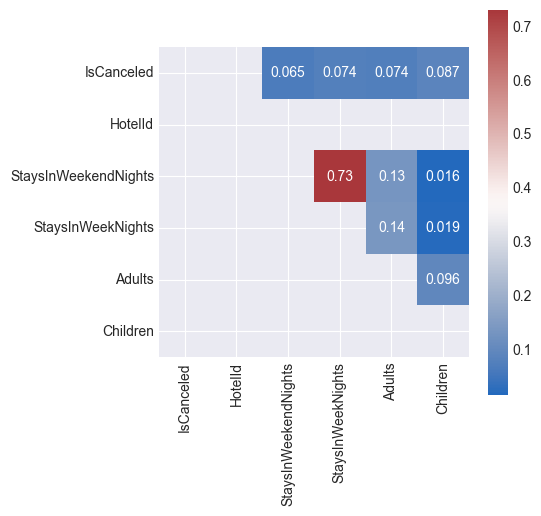

In [18]:
fig = plt.figure(figsize=(5, 5))
corr = df[['IsCanceled']+non_categorical].corr()
sns.heatmap(corr, mask=np.tril(corr), annot=True, cmap='vlag', square=True)

Observamos una correlación relativamente alta entre 'StaysInWeekendNights' y 'StaysInWeekNights'.

In [19]:
df['HotelId'].nunique()

1

In [20]:
df.drop('HotelId', axis=1, inplace=True)

## Continuous

In [21]:
# customize `binwidth` for each continuous parameter's histogram plot
# based on the nature of the parameter
binwidth = {
    'LeadTime': 5., # 5 days
    'ADR': 10. # 10€
}

props = {
    'boxprops': {'edgecolor': 'w'},
    'medianprops': {'color': 'w'},
    'whiskerprops': {'color': 'w'},
    'capprops': {'color': 'w'},
    'flierprops': {'markeredgecolor': 'w', 'marker': 'o'}
}

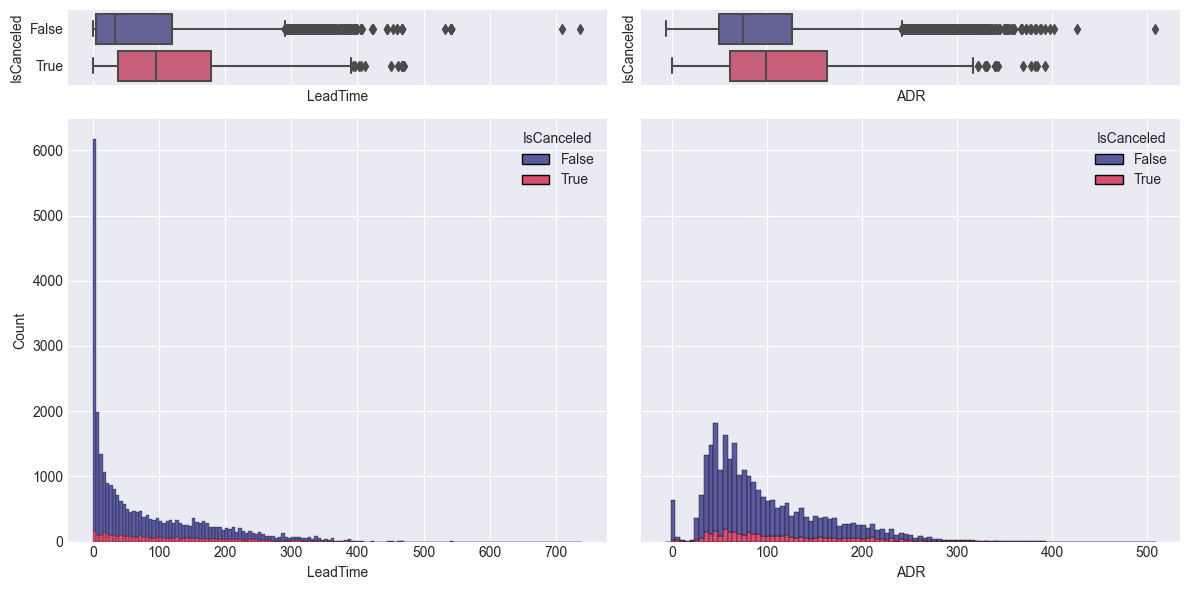

In [22]:
# configure figure for a combined box + histogram plot
fig, ax = plt.subplots(2, 2, sharex='col', sharey='row', 
                                      figsize=(12, 6), 
                                      gridspec_kw={"height_ratios": (.15, .85)})
ax = ax.flatten()

sns.boxplot(data=df, x='LeadTime', y='IsCanceled', ax=ax[0], orient='h')

sns.histplot(data=df, x='LeadTime', ax=ax[2], 
             binwidth=binwidth['LeadTime'], hue="IsCanceled", 
             multiple='stack', alpha=1.)

sns.boxplot(data=df, x='ADR', y='IsCanceled', ax=ax[1], orient='h')

sns.histplot(data=df, x='ADR', ax=ax[3], 
             binwidth=binwidth['LeadTime'], hue="IsCanceled", 
             multiple='stack', alpha=1.)

fig.tight_layout()

En la variable 'LeadTime' puede observarse como la distribucion para las reservas que se cancelaron es más uniforme que para los que no cancelaron. Lo mismo sucede con la variable 'ADR'. Además, para estas dos variables observamos muchos outliers.

<Axes: >

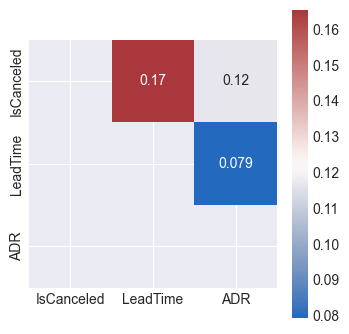

In [23]:
fig = plt.figure(figsize=(4, 4))
corr = df[['IsCanceled']+['LeadTime', 'ADR']].corr()
sns.heatmap(corr, mask=np.tril(corr), annot=True, cmap='vlag', square=True)

'ADR' y 'LeadTime' no presentan correlación.

In [24]:
df.describe()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,ADR
count,28117.000000,28117.000000,28117.000000,28117.000000,28117.000000,28117.000000
mean,78.526870,1.212398,3.154924,1.871395,0.138493,97.418410
std,89.472026,1.160838,2.497510,0.548766,0.453198,62.618751
min,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,6.000000,0.000000,1.000000,2.000000,0.000000,51.000000
50%,41.000000,1.000000,3.000000,2.000000,0.000000,78.230000
75%,129.000000,2.000000,5.000000,2.000000,0.000000,131.400000
max,737.000000,16.000000,40.000000,27.000000,3.000000,508.000000


Haciendo el describe sobre las variables numéricas vemos que la variable 'ADR' presenta valores negativos los cuales, teniendo en cuenta que esta variable contiene los precios medios de reserva, no tienen mucho sentido.

In [25]:
df[df['ADR'] < 0]

,ReservationStatusDate,ArrivalDate,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,CustomerType,ADR,Meal,Country,Company,ReservedRoomType,IsCanceled
14969,2017-03-15,2017-03-05,195,4,6,2,0,Transient-Party,-6.38,BB,GBR,NULL,A,False


Podríamos suponer que un valor negativo significa una devolución del dinero o una situación similar, pero en este caso, al ser solo una fila, la eliminamos.

In [26]:
df = df[df['ADR'] >= 0]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28116 entries, 10043 to 40059
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ReservationStatusDate  28116 non-null  object 
 1   ArrivalDate            28116 non-null  object 
 2   LeadTime               28116 non-null  int64  
 3   StaysInWeekendNights   28116 non-null  int64  
 4   StaysInWeekNights      28116 non-null  int64  
 5   Adults                 28116 non-null  int64  
 6   Children               28116 non-null  int64  
 7   CustomerType           28116 non-null  object 
 8   ADR                    28116 non-null  float64
 9   Meal                   28116 non-null  object 
 10  Country                28116 non-null  object 
 11  Company                28116 non-null  object 
 12  ReservedRoomType       28116 non-null  object 
 13  IsCanceled             28116 non-null  bool   
dtypes: bool(1), float64(1), int64(5), object(7)
memory

## Dates

In [28]:
df['ReservationStatusDate'] = pd.to_datetime(df['ReservationStatusDate'], format='%Y-%m-%d')
df['ArrivalDate'] = pd.to_datetime(df['ArrivalDate'], format='%Y-%m-%d')

Podemos observar que existen registros con 'ReservationStatusDate' posterior a 'ArrivalDate' (No puedes realizar una reserva para una fecha pasada, por lo que no tienen sentido estos valores).

In [29]:
df[df['ReservationStatusDate'] > df['ArrivalDate']]

,ReservationStatusDate,ArrivalDate,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,CustomerType,ADR,Meal,Country,Company,ReservedRoomType,IsCanceled
2,2015-07-02,2015-07-01,7,0,1,1,0,Transient,75.00,BB,GBR,NULL,A,False
3,2015-07-02,2015-07-01,13,0,1,1,0,Transient,75.00,BB,GBR,NULL,A,False
4,2015-07-03,2015-07-01,14,0,2,2,0,Transient,98.00,BB,GBR,NULL,A,False
6,2015-07-03,2015-07-01,0,0,2,2,0,Transient,107.00,BB,PRT,NULL,C,False
7,2015-07-03,2015-07-01,9,0,2,2,0,Transient,103.00,FB,PRT,NULL,C,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,2017-09-10,2017-08-31,212,2,8,2,1,Transient,89.75,BB,GBR,NULL,A,False
40056,2017-09-10,2017-08-30,169,2,9,2,0,Transient-Party,202.27,BB,IRL,NULL,E,False
40057,2017-09-12,2017-08-29,204,4,10,2,0,Transient,153.57,BB,IRL,NULL,E,False
40058,2017-09-14,2017-08-31,211,4,10,2,0,Contract,112.80,HB,GBR,NULL,D,False


Por esta razon, nos quedaremos solo con la variable 'ArrivalDate' y la separaremos en varias variables (año, mes, semana y día) para poder analizarla mejor.

In [30]:
df['ArrivalYear'] = df['ArrivalDate'].dt.year
df['ArrivalMonth'] = df['ArrivalDate'].dt.month
df['ArrivalWeek'] = df['ArrivalDate'].dt.isocalendar().week.astype(float)
df['ArrivalDay'] = df['ArrivalDate'].dt.day

In [31]:
df.drop(['ReservationStatusDate', 'ArrivalDate'], axis=1, inplace=True)

In [32]:
dates = ['ArrivalYear', 'ArrivalMonth', 'ArrivalWeek', 'ArrivalDay']

In [33]:
df['ArrivalYear']

10043    2017
19043    2016
3509     2015
5012     2016
17991    2015
         ... 
40055    2017
40056    2017
40057    2017
40058    2017
40059    2017
Name: ArrivalYear, Length: 28116, dtype: int64

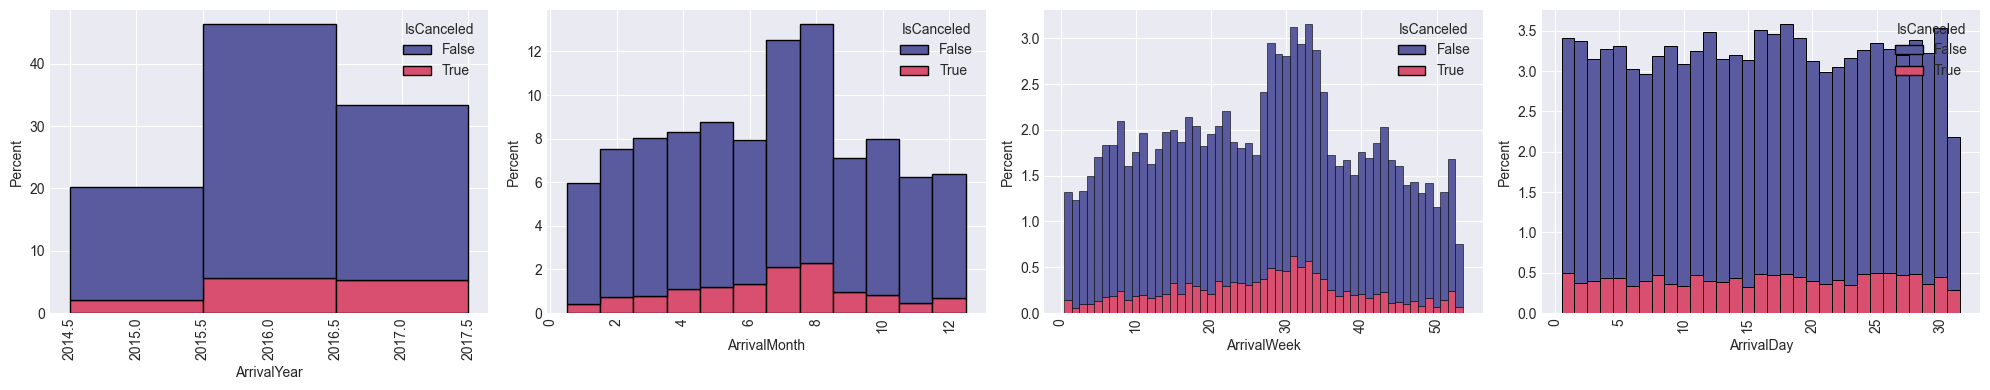

In [34]:

fig, ax = plt.subplots(1, 4,figsize=(20, 4))
ax = ax.flatten()

for i, label in enumerate(dates):
    chart = sns.histplot(data=df, x=label, hue='IsCanceled', 
                         ax=ax[i], discrete=True, stat='percent', alpha=1., 
                         multiple='stack', bins='auto')
    plt.setp(chart.get_xticklabels(), rotation = 90)

fig.tight_layout()

Observamos que en 2017 se produce un aumento de cancelaciones con respecto a las reservas totales. Además, en los meses de verano también se observa un aumento, tanto de reservas como de cancelaciones. 

# Preprocessing

In [35]:
target = df['IsCanceled']
features = df.drop('IsCanceled', axis=1)

In [36]:
# Delete blank spaces in string values

for str_col in features.select_dtypes('object').columns:
    features[str_col] = features[str_col].str.replace(" ", "")

In [37]:
cat_columns = features.select_dtypes('object').columns
num_columns = features.select_dtypes(exclude=('object')).columns

In [38]:
features_encoded = pd.get_dummies(data=features,
                               prefix=None, 
                               prefix_sep="_",
                               columns=cat_columns,
                               drop_first="True")

In [39]:
scaler = MinMaxScaler()

for col in num_columns: 
  features_encoded[col] = scaler.fit_transform(features_encoded[col].values.reshape(-1, 1))

In [40]:
features_encoded.head()

,LeadTime,StaysInWeekendNights,StaysInWeekNights,Adults,Children,ADR,ArrivalYear,ArrivalMonth,ArrivalWeek,ArrivalDay,...,Company_99,Company_NULL,ReservedRoomType_B,ReservedRoomType_C,ReservedRoomType_D,ReservedRoomType_E,ReservedRoomType_F,ReservedRoomType_G,ReservedRoomType_H,ReservedRoomType_L
10043,0.322931,0.000,0.050,0.074074,0.000000,0.106299,1.0,0.090909,0.096154,0.300000,...,0,1,0,0,0,0,0,0,0,0
19043,0.236092,0.125,0.125,0.074074,0.333333,0.212638,0.5,0.363636,0.384615,0.866667,...,0,1,0,0,0,0,1,0,0,0
3509,0.352782,0.250,0.225,0.037037,0.000000,0.093583,0.0,1.000000,0.961538,0.633333,...,0,1,0,0,1,0,0,0,0,0
5012,0.227951,0.000,0.050,0.074074,0.000000,0.169291,0.5,0.272727,0.269231,0.366667,...,0,1,0,0,0,0,0,0,0,0
17991,0.001357,0.000,0.025,0.037037,0.000000,0.068898,0.0,0.909091,0.865385,0.333333,...,0,0,0,0,0,0,0,0,0,0


Comprobamos que no haya ninguna variable de tipo string

In [41]:
features_encoded.select_dtypes('object').columns

Index([], dtype='object')

Comprobamos que el dataframe de features y e de target tengas el mismo numero de filas

In [42]:
print(features_encoded.shape[0] == target.shape[0])

True


# Split TRAIN-TEST data

In [43]:
# Train (80%) and Test (20%)
X_train, X_test, y_train, y_test = train_test_split(features_encoded, target, test_size=0.2, random_state=20)

In [44]:
# Oversampling

resampler = RandomOverSampler()
X_train, y_train = resampler.fit_resample(X_train, y_train)

# TRAIN-VALIDATION

## Model Competition

In [45]:
# Calculates AUC of model over a dataset (X-y). Args: model, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])  

# Calculates AUC in Cross-Validation (X-y). Args: model, X, y  
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model, 
                              X, y, 
                              cv=4,                 # Fold number
                              scoring='roc_auc'     # Validation metric
                              )    
  return cross_val.mean()

In [46]:
# Initialize results
label_, auc_train_ , auc_valida_ = [], [], []

# Completes a dataframe record with the results of the predefined functions (AUC and AUC with cross-validation).

# Inputs: 
#   * model
#   * (X,y) 
#   * specific label if we want to register the result with another name (optional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)
  
  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)   
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Probamos varios modelos con su configuración por defecto para evaluar cuál ofrece mejores resultados a priori.

In [47]:
evaluate_classification(label='Logistic Regression', 
                    model = LogisticRegression(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
0,Logistic Regression,0.786883,0.783859


In [48]:
evaluate_classification(label='KNN', 
                    model = KNeighborsClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,KNN,0.995011,0.918895
0,Logistic Regression,0.786883,0.783859


In [49]:
evaluate_classification(label='LGBM', 
                    model = LGBMClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
0,Logistic Regression,0.786883,0.783859


In [50]:
evaluate_classification(label='XGBoost', 
                    model = XGBClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
0,Logistic Regression,0.786883,0.783859


In [51]:
evaluate_classification(label='Naive Bayes', 
                    model = GaussianNB(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
0,Logistic Regression,0.786883,0.783859
4,Naive Bayes,0.524277,0.521523


In [52]:
evaluate_classification(label='ANN', 
                    model = MLPClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
5,ANN,0.935644,0.908010
0,Logistic Regression,0.786883,0.783859
4,Naive Bayes,0.524277,0.521523


In [53]:
evaluate_classification(label='Ada Boost', 
                    model = AdaBoostClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
5,ANN,0.935644,0.908010
6,Ada Boost,0.823592,0.820936
0,Logistic Regression,0.786883,0.783859
4,Naive Bayes,0.524277,0.521523


In [54]:
evaluate_classification(label='Bagging', 
                    model = BaggingClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
7,Bagging,0.999966,0.993563
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
5,ANN,0.935644,0.908010
6,Ada Boost,0.823592,0.820936
0,Logistic Regression,0.786883,0.783859
4,Naive Bayes,0.524277,0.521523


In [55]:
evaluate_classification(label='Extra Trees', 
                    model = ExtraTreesClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
8,Extra Trees,0.999983,0.998261
7,Bagging,0.999966,0.993563
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
5,ANN,0.935644,0.908010
6,Ada Boost,0.823592,0.820936
0,Logistic Regression,0.786883,0.783859
4,Naive Bayes,0.524277,0.521523


In [56]:
evaluate_classification(label='Gradient Boost', 
                    model = GradientBoostingClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
8,Extra Trees,0.999983,0.998261
7,Bagging,0.999966,0.993563
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
5,ANN,0.935644,0.908010
9,Gradient Boost,0.861071,0.856180
6,Ada Boost,0.823592,0.820936
0,Logistic Regression,0.786883,0.783859
4,Naive Bayes,0.524277,0.521523


In [57]:
evaluate_classification(label='Random Forest', 
                    model = RandomForestClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
8,Extra Trees,0.999983,0.998261
10,Random Forest,0.999979,0.997893
7,Bagging,0.999966,0.993563
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
5,ANN,0.935644,0.908010
9,Gradient Boost,0.861071,0.856180
6,Ada Boost,0.823592,0.820936
0,Logistic Regression,0.786883,0.783859


In [58]:
evaluate_classification(label='Hist Gradient', 
                    model = HistGradientBoostingClassifier(), 
                    X=X_train, y=y_train)

,Model,AUC Train,AUC Cross-Valida
8,Extra Trees,0.999983,0.998261
10,Random Forest,0.999979,0.997893
7,Bagging,0.999966,0.993563
3,XGBoost,0.953965,0.936340
1,KNN,0.995011,0.918895
2,LGBM,0.927268,0.910893
11,Hist Gradient,0.924575,0.910548
5,ANN,0.935644,0.908010
9,Gradient Boost,0.861071,0.856180
6,Ada Boost,0.823592,0.820936


Viendo los resultados, se ha optado por XGBoost ya que, tras realizar varias pruebas, Extra Trees, Random Forest y Bagging no ofrecen los mejores resultados a la hora de predecir el conjunto de test.

XGBoost es altamente eficiente y escalable, con unas velocidades de prediccion relativamente altas.
Además, XGBoost es consistente ante datos con outliers, como sucede en este dataset.

In [46]:
params = {
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 6, 9],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'min_child_samples': [10, 20, 30],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

In [47]:
search_hp = RandomizedSearchCV(estimator = XGBClassifier(), 
                   param_distributions = params, 
                   n_iter = 8, 
                   scoring= 'roc_auc',
                   n_jobs= -1, 
                   cv= 3,
                   verbose=True)

In [48]:
search_hp.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[15:54:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "min_child_samples", "num_leaves" } are not used.



RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_iter=8, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8, 0.9, 1.0],
                                        'learning_rate': [0.1, 0.01, 0.001],
                                        'max_depth': [3, 6, 9],
                                        'min_child_samples': [10, 20, 30],
                                        'n_estimators': [100, 500, 1000],
                                        'num_leaves': [31, 63, 127],
                                        'reg_alpha': [0, 0.1, 0.5],
                                        'reg_lambda': [0, 0.1, 0.5],
                                        'subsample': [0.8, 0.9, 1.0]},
                   scoring='roc_auc', verbose=True)

In [49]:
search_hp.best_params_

{'subsample': 0.9,
 'reg_lambda': 0,
 'reg_alpha': 0.5,
 'num_leaves': 31,
 'n_estimators': 100,
 'min_child_samples': 30,
 'max_depth': 6,
 'learning_rate': 0.1,
 'colsample_bytree': 0.9}

In [51]:
search_hp.best_score_

0.9108489961955266

In [50]:
model = XGBClassifier(subsample=0.9, 
    reg_lambda=0,
    reg_alpha=0.5,
    n_estimators=100,
    min_child_weight=30,
    max_depth=6,
    learning_rate=0.1,
    colsample_bytree=0.9).fit(X_train, y_train)

[15:58:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "num_leaves" } are not used.



# TEST


*   **AUC**

In [52]:
y_train_pred_proba = model.predict_proba(X_train)[:,1]
y_test_pred_proba = model.predict_proba(X_test)[:,1]

In [53]:
# AUC Metricas
auc_train = roc_auc_score(y_train, y_train_pred_proba)
auc_test = roc_auc_score(y_test, y_test_pred_proba)

In [54]:
print('AUC Train: ', round(auc_train, 4))
print('AUC Test: ', round(auc_test, 4))

AUC Train:  0.9036
AUC Test:  0.8647


*   **ROC Curve**

In [55]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [56]:
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred_proba)

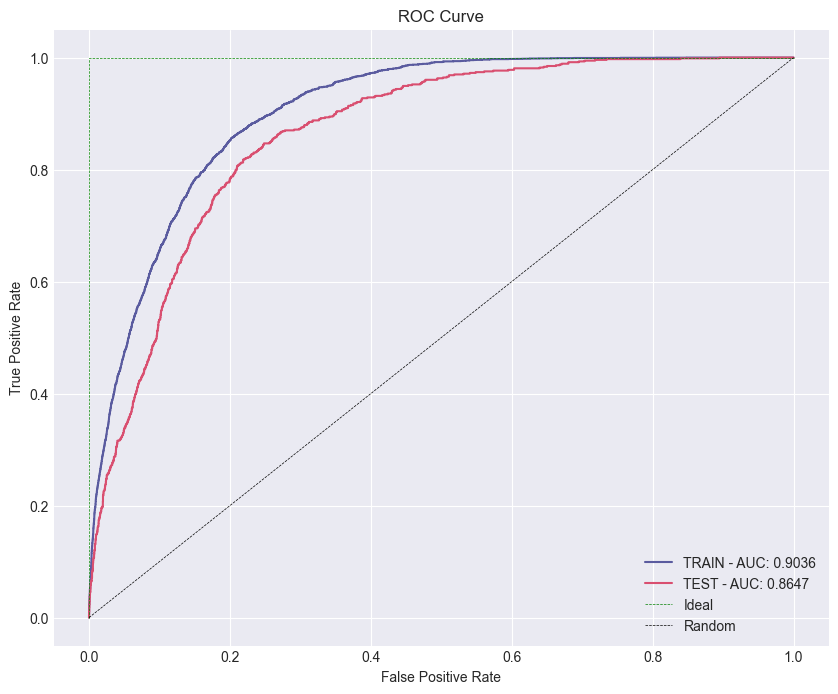

In [57]:
#Plot
plt.figure(figsize=[10,8])
plt.plot(fpr_train, tpr_train, label='TRAIN - AUC: {:.4f}'.format(auc_train))
plt.plot(fpr_test, tpr_test, label='TEST - AUC: {:.4f}'.format(auc_test))
plt.title('ROC Curve')
plt.plot([0,0,1],[0,1,1], color='green', linestyle='--', linewidth=0.5, label='Ideal')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', linewidth=0.5, label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Como vemos, aunque este modelo presenta cierto overfitting (debido al hecho de haber hecho oversampling sobre el dataset de entrenamiento), no es tan exagerado como con otro modelos que se han probado. 

*   **Confusion Matrix**

[]

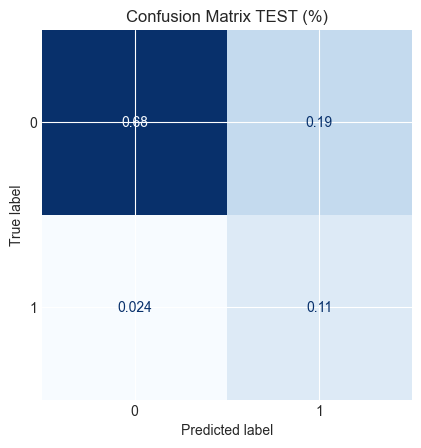

In [60]:
cm_test = confusion_matrix(y_test, y_test_pred)

ConfusionMatrixDisplay(confusion_matrix=cm_test/len(y_test)).plot(colorbar = False, cmap = 'Blues')
plt.title('Confusion Matrix TEST (%)')
plt.plot()

*   **Accuracy, Precision, Recall y F1-Score**

In [61]:
# Accuracy, Precision, Recall and F1-Score

print('Accuracy:', round( accuracy_score(y_test, y_test_pred),4))
print('Precision:', round( precision_score(y_test, y_test_pred), 4))
print('Recall:', round( recall_score(y_test, y_test_pred), 4))
print('F1-score:', round(f1_score(y_test, y_test_pred), 4))

Accuracy: 0.7841
Precision: 0.3562
Recall: 0.8181
F1-score: 0.4963


# Interpretability

Con estas gráficas podemos ver la importancia de las diferentes *features* en nuestro modelo. Si analizamos las 4 *features* más importantes vemos que los resultados tienen bastante sentido.

La *feature* más importante es **'Country_PRT'**. Este país es el más frecuente en el dataset, presentando muchas reservas y cancelaciones.

La siguiente *feature* es **'LeadTime'**. Esto se debe a que las reservas hechas con poca antelación no suelen cancelarse.

La siguiente *feature* es **'ArrivalYear'**. Como vimos en el análisis de variables, en el año 2017 se producía un aumento de cancelaciones. Por ello, esta variable presenta un patrón distintivo a la hora de detectar si se va a producir una cancelación o no.

La siguiente *feature* es **'ADR'**, el precio medio de reserva. 

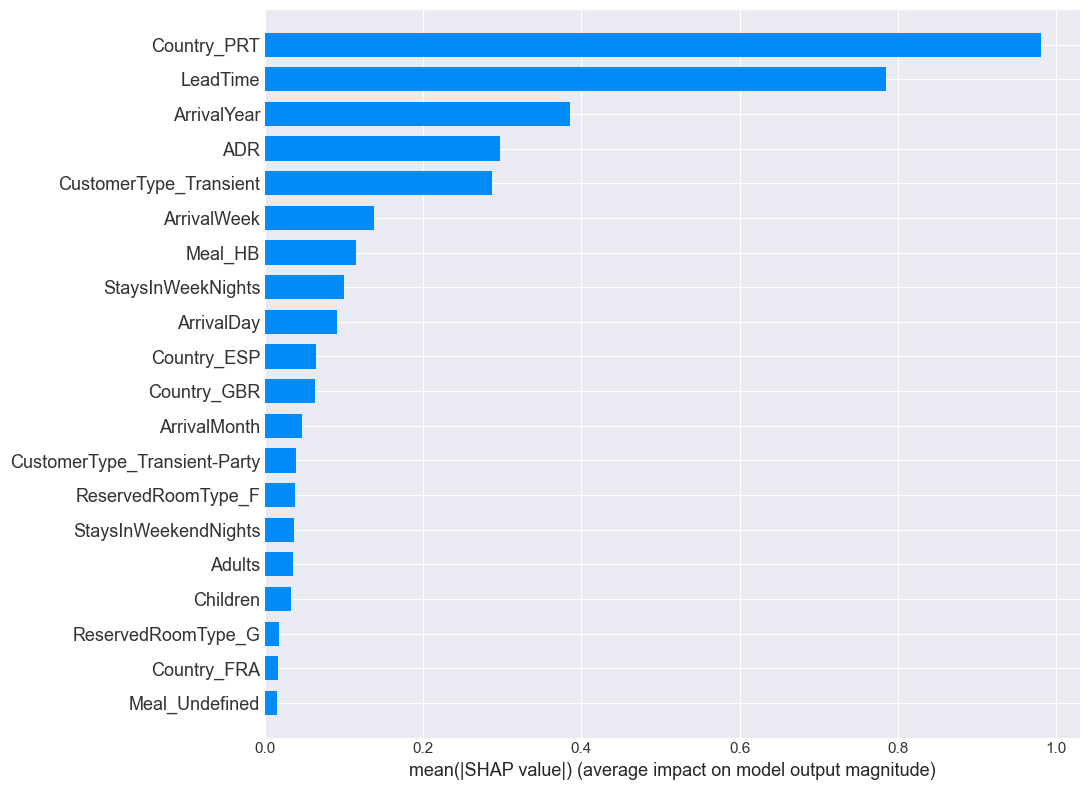

In [62]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=20, plot_size=(11, 8))